In [2]:
# Dependencies
import pandas as pd
import scipy.stats as st
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
# Store filepath in a variable
us_data_path= "archive/USvideos.csv"

In [4]:
# Read the datafile with the pandas library
us_data_df = pd.read_csv(us_data_path)

In [5]:
# Looking at the data
us_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
# Looking at the data
us_data_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [7]:
## Obtaining the name of the category_id from the json file ###

# Getting the information out of the json file so we can give category_id a name
assignable_list =[]
id_list = []
title_list = []

with open ("US_category_id.json") as f:
    data = json.load (f)

for item in data["items"]:
    assignable_list.append(item["snippet"]["assignable"])
    id_list.append(item["id"])
    title_list.append(item["snippet"]["title"])
 
# Save to a new dataframe 
title_id_df=pd.DataFrame({"category_name": title_list, "category_id":id_list, "Assignable":assignable_list})

# Changing the data type of category_id to an integer so it's consistent with the file we will merge it with next
title_id_df = title_id_df.astype({"category_id" : int}, errors='raise')




In [8]:
# merging Title_Id_df to us_data_df to bring through the category_name
us_data_df = pd.merge(us_data_df, title_id_df[['category_id', 'category_name']], how='left', on='category_id')
us_data_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [9]:
## ## 'trending_date' - chaninging the date format and pulling out key apsects needed for analysis ##

# Chaning the fromat of 'trending_date' from object to datetime
us_data_df['trending_date_formatted'] = pd.to_datetime(us_data_df['trending_date'], format='%y.%d.%m')

# Getting the day of the week the video trended and assigning it to a column
us_data_df["trending_day"] = us_data_df['trending_date_formatted'].dt.day_name()

# Getting the month the video trended and assigning it to a column
us_data_df["trending_month"] = us_data_df['trending_date_formatted'].dt.month_name()

# Getting the year the video trended and assigning it to a column
us_data_df["trending_year"] = us_data_df['trending_date_formatted'].dt.year

# Changing the order to day/month/year
us_data_df['trending_date_formatted_order'] = us_data_df['trending_date_formatted'].dt.strftime('%d/%m/%Y')

In [10]:
## 'publish_date' - changing date formats and pulling out key aspects required for analysis ##

# Changing 'publish_time' to datetime format
us_data_df['publish_time_formatted'] = pd.to_datetime(us_data_df["publish_time"])

# Getting the day of the week the video was published and assigning it to a column
us_data_df["publish_day"] = us_data_df['publish_time_formatted'].dt.day_name()

# Getting the month the video was published and assigning it to a column
us_data_df["publish_month"] = us_data_df['publish_time_formatted'].dt.month_name()

# Getting the year the video was published and assigning it to a column
us_data_df["publish_year"] = us_data_df['publish_time_formatted'].dt.year

# Checking that the above columns have been added to the dataframe
us_data_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,category_name,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,People & Blogs,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 17:13:01+00:00,Monday,November,2017
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,Entertainment,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 07:30:00+00:00,Monday,November,2017
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,Comedy,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 19:05:24+00:00,Sunday,November,2017
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,Entertainment,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 11:00:04+00:00,Monday,November,2017
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,Entertainment,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 18:01:41+00:00,Sunday,November,2017


In [11]:
# Ensuring the formatted dates dtype have changed
us_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   video_id                       40949 non-null  object             
 1   trending_date                  40949 non-null  object             
 2   title                          40949 non-null  object             
 3   channel_title                  40949 non-null  object             
 4   category_id                    40949 non-null  int64              
 5   publish_time                   40949 non-null  object             
 6   tags                           40949 non-null  object             
 7   views                          40949 non-null  int64              
 8   likes                          40949 non-null  int64              
 9   dislikes                       40949 non-null  int64              
 10  comment_count         

In [12]:
# Counting the number of tags for each video and adding it to a new column
tag_count = []
tag = us_data_df['tags']
for word in tag:
    tag_split = word.split('|') 
    number_tags = len(tag_split)
    tag_count.append(number_tags)

us_data_df['tag_count'] = tag_count
us_data_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 17:13:01+00:00,Monday,November,2017,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 07:30:00+00:00,Monday,November,2017,4
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 19:05:24+00:00,Sunday,November,2017,23
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-13 11:00:04+00:00,Monday,November,2017,27
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,2017-11-14,Tuesday,November,2017,14/11/2017,2017-11-12 18:01:41+00:00,Sunday,November,2017,14


In [13]:
# Checking whether any video has no tag attached to it
no_tag = us_data_df.loc[us_data_df['tag_count'] == 0, :]
no_tag

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count


In [14]:
# Filtering out those with a category_id = 43, as that category is not assignable
cleaned_us_data_df = us_data_df.loc[us_data_df['category_id'] != 43, :]

# Checking category_id = 43 has been filtered out
cleaned_us_data_df["category_id"].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
Name: category_id, dtype: int64

In [15]:
cleaned_us_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40892 entries, 0 to 40948
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   video_id                       40892 non-null  object             
 1   trending_date                  40892 non-null  object             
 2   title                          40892 non-null  object             
 3   channel_title                  40892 non-null  object             
 4   category_id                    40892 non-null  int64              
 5   publish_time                   40892 non-null  object             
 6   tags                           40892 non-null  object             
 7   views                          40892 non-null  int64              
 8   likes                          40892 non-null  int64              
 9   dislikes                       40892 non-null  int64              
 10  comment_count         

In [16]:
# Saving the cleaned file to a csv
cleaned_us_data_df.to_csv("output/cleaned_us_data.csv", index=False)

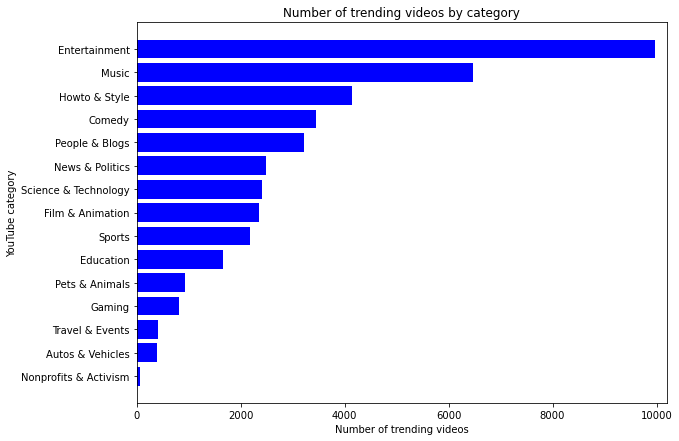

In [17]:
# read in csv file
cleaned_us_data_df = pd.read_csv('output/cleaned_us_data.csv')
# perform value counts on category name
category_counts = cleaned_us_data_df["category_name"].value_counts().sort_values()
# Plotting it
counts = category_counts.values
x_axis = category_counts.index.values
plt.figure(figsize=(9.5,7))
plt.barh(x_axis, counts, color='blue', alpha=1, align = "center")
plt.xticks(rotation=0)
plt.ylabel("YouTube category")
plt.xlabel("Number of trending videos")
plt.title("Number of trending videos by category")
plt.xlim(0, 10200);



In [18]:
unique_video_df =pd.DataFrame(category_counts)
unique_video_df


,category_name
Nonprofits & Activism,57
Autos & Vehicles,384
Travel & Events,402
Gaming,817
Pets & Animals,920
Education,1656
Sports,2174
Film & Animation,2345
Science & Technology,2401
News & Politics,2487


In [19]:
# Changing trending_date to date format it can be sorted by date
unique_video2 = pd.to_datetime(cleaned_us_data_df['trending_date'], format='%y.%d.%m')
# Sorting the dataframe by trending_date in ascending order
unique_video2 = cleaned_us_data_df.sort_values(by='trending_date', ascending=True)
# Taking the last row for each video_id
unique_video2 = cleaned_us_data_df.groupby('video_id').last()
unique_video2.reset_index(inplace = True)
unique_video2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   video_id                       6347 non-null   object
 1   trending_date                  6347 non-null   object
 2   title                          6347 non-null   object
 3   channel_title                  6347 non-null   object
 4   category_id                    6347 non-null   int64 
 5   publish_time                   6347 non-null   object
 6   tags                           6347 non-null   object
 7   views                          6347 non-null   int64 
 8   likes                          6347 non-null   int64 
 9   dislikes                       6347 non-null   int64 
 10  comment_count                  6347 non-null   int64 
 11  thumbnail_link                 6347 non-null   object
 12  comments_disabled              6347 non-null   bool  
 13  rat

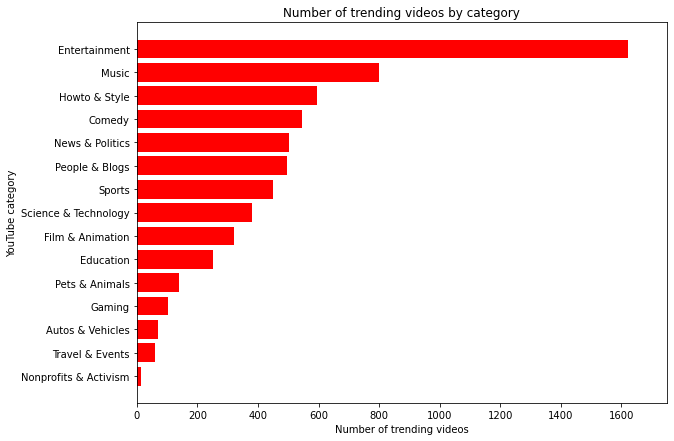

In [20]:
# perform value counts on category name
category_counts = unique_video2["category_name"].value_counts().sort_values()
counts = category_counts.values
x_axis = category_counts.index.values
plt.figure(figsize=(9.5,7))
plt.barh(x_axis, counts, color='red', alpha=1, align = "center")
plt.xticks(rotation=0)
plt.ylabel("YouTube category")
plt.xlabel("Number of trending videos")
plt.title("Number of trending videos by category")
plt.xlim(0, 1750);
